<a href="https://colab.research.google.com/github/kalai2315/Deep-Learning-Codes/blob/main/DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize images to values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to be compatible with a fully connected network
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Model Development:**

Input Layer: The input size should match the number of pixels in each image, i.e., 784.

Hidden Layers: Add one or more hidden layers with ReLU activation. These layers will learn the representations and patterns in the image data.

Output Layer: The output layer should have 10 neurons (one for each class) and use the softmax activation function to output probabilities.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6839 - loss: 1.1498 - val_accuracy: 0.9039 - val_loss: 0.3397
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9041 - loss: 0.3425 - val_accuracy: 0.9194 - val_loss: 0.2749
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9216 - loss: 0.2748 - val_accuracy: 0.9316 - val_loss: 0.2370
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9312 - loss: 0.2379 - val_accuracy: 0.9406 - val_loss: 0.2098
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9421 - loss: 0.2088 - val_accuracy: 0.9451 - val_loss: 0.1940
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9467 - loss: 0.1879 - val_accuracy: 0.9515 - val_loss: 0.1797
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9528 - loss: 0.1703 - val_accuracy: 0.9533 - val_loss: 0.1657
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9572 - loss: 0.1505 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1106
Test accuracy: 0.9713


In [ ]:
import numpy as np

# Predict class probabilities for the test set
predictions = model.predict(X_test)

# Convert the predictions into class labels
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Check the first few predictions
print(predicted_classes[:10], actual_classes[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7 2 1 0 4 1 4 9 6 9] [7 2 1 0 4 1 4 9 5 9]


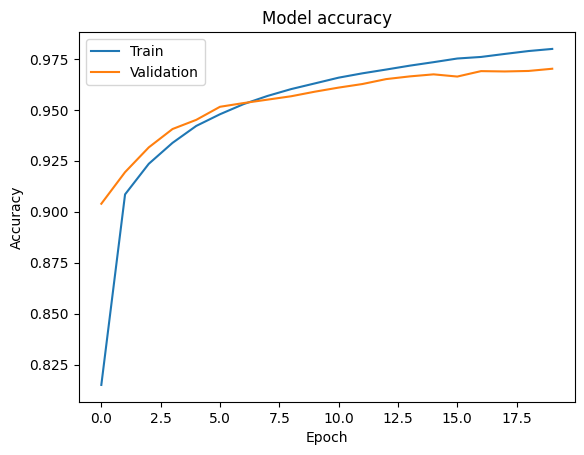

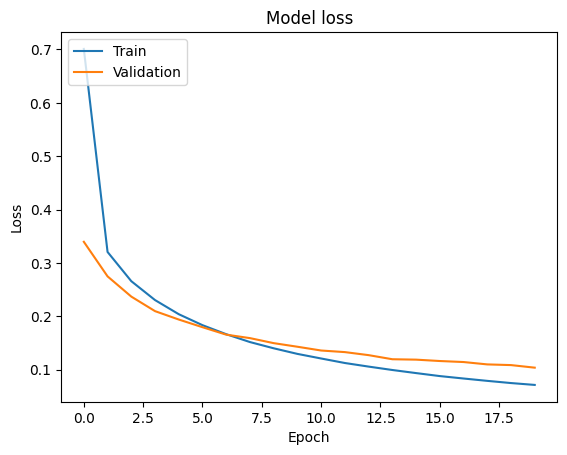

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assume predicted_classes contains the predicted labels
# Assume actual_classes contains the true labels

# Accuracy
accuracy = accuracy_score(actual_classes, predicted_classes)

# Precision, Recall, F1-Score
precision = precision_score(actual_classes, predicted_classes, average='weighted')
recall = recall_score(actual_classes, predicted_classes, average='weighted')
f1 = f1_score(actual_classes, predicted_classes, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# For a full classification report
print(classification_report(actual_classes, predicted_classes))


Accuracy: 0.9713
Precision: 0.9713
Recall: 0.9713
F1 Score: 0.9713
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

